<a href="https://colab.research.google.com/github/YoussefJJ/arabic-sentiment-analysis-for-hotel-reviews/blob/main/multi_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Getting the Data**
This procedure consists of reading the dataset files and loading them in a Pandas DataFrame, then splitting the dataframe into 2 parts: training set and validation set, which we will be using later on.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

DATASETS_PATH = '/content/drive/MyDrive/PFA/datasets/'

df = pd.read_excel(DATASETS_PATH + "train_original.xlsx")
train_df, val_df = train_test_split(df, test_size=0.1)
texts = list(train_df["text"])
label_names = train_df.drop(["text"], axis=1).columns
labels = train_df[label_names].values

train_texts, val_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

sample_idx = 24
print(f'Sample: "{train_texts[sample_idx]}"')
print(f"Labels: {pd.Series(train_labels[sample_idx], label_names).to_dict()}")

Sample: "5 - حوض سباحه رائع"
Labels: {'FACILITIES#CLEANLINESS': 0, 'FACILITIES#COMFORT': 0, 'FACILITIES#DESIGN_FEATURES': 0, 'FACILITIES#GENERAL': 1, 'FACILITIES#MISCELLANEOUS': 0, 'FACILITIES#PRICES': 0, 'FACILITIES#QUALITY': 0, 'FOOD_DRINKS#MISCELLANEOUS': 0, 'FOOD_DRINKS#PRICES': 0, 'FOOD_DRINKS#QUALITY': 0, 'FOOD_DRINKS#STYLE_OPTIONS': 0, 'HOTEL#CLEANLINESS': 0, 'HOTEL#COMFORT': 0, 'HOTEL#DESIGN_FEATURES': 0, 'HOTEL#GENERAL': 0, 'HOTEL#MISCELLANEOUS': 0, 'HOTEL#PRICES': 0, 'HOTEL#QUALITY': 0, 'LOCATION#GENERAL': 0, 'ROOMS#CLEANLINESS': 0, 'ROOMS#COMFORT': 0, 'ROOMS#DESIGN_FEATURES': 0, 'ROOMS#GENERAL': 0, 'ROOMS#MISCELLANEOUS': 0, 'ROOMS#PRICES': 0, 'ROOMS#QUALITY': 0, 'ROOMS_AMENITIES#CLEANLINESS': 0, 'ROOMS_AMENITIES#COMFORT': 0, 'ROOMS_AMENITIES#DESIGN_FEATURES': 0, 'ROOMS_AMENITIES#GENERAL': 0, 'ROOMS_AMENITIES#MISCELLANEOUS': 0, 'ROOMS_AMENITIES#PRICES': 0, 'ROOMS_AMENITIES#QUALITY': 0, 'SERVICE#GENERAL': 0}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

DATASETS_PATH = '/content/drive/MyDrive/PFA/datasets/'

df = pd.read_excel(DATASETS_PATH + "train_original.xlsx")
DATASET_SIZE = len(df)
train_size = int(DATASET_SIZE * 0.8)
val_size = int(DATASET_SIZE * 0.2)
train_df = df[train_size:]
val_df =  df[:val_size]

train_texts = list(train_df["text"])
val_texts = list(val_df["text"])

label_names = train_df.drop(["text"], axis=1).columns
train_labels = train_df[label_names].values
val_labels = val_df[label_names].values

# train_texts, val_texts, train_labels, test_labels = train_test_split(
#     texts, labels, test_size=0.2, random_state=42
# )

sample_idx = 24
print(f'Sample: "{train_texts[sample_idx]}"')
print(f"Labels: {pd.Series(train_labels[sample_idx], label_names).to_dict()}")

Sample: "موظفي الفندق لطفاء وخدومين."
Labels: {'FACILITIES#CLEANLINESS': 0, 'FACILITIES#COMFORT': 0, 'FACILITIES#DESIGN_FEATURES': 0, 'FACILITIES#GENERAL': 0, 'FACILITIES#MISCELLANEOUS': 0, 'FACILITIES#PRICES': 0, 'FACILITIES#QUALITY': 0, 'FOOD_DRINKS#MISCELLANEOUS': 0, 'FOOD_DRINKS#PRICES': 0, 'FOOD_DRINKS#QUALITY': 0, 'FOOD_DRINKS#STYLE_OPTIONS': 0, 'HOTEL#CLEANLINESS': 0, 'HOTEL#COMFORT': 0, 'HOTEL#DESIGN_FEATURES': 0, 'HOTEL#GENERAL': 0, 'HOTEL#MISCELLANEOUS': 0, 'HOTEL#PRICES': 0, 'HOTEL#QUALITY': 0, 'LOCATION#GENERAL': 0, 'ROOMS#CLEANLINESS': 0, 'ROOMS#COMFORT': 0, 'ROOMS#DESIGN_FEATURES': 0, 'ROOMS#GENERAL': 0, 'ROOMS#MISCELLANEOUS': 0, 'ROOMS#PRICES': 0, 'ROOMS#QUALITY': 0, 'ROOMS_AMENITIES#CLEANLINESS': 0, 'ROOMS_AMENITIES#COMFORT': 0, 'ROOMS_AMENITIES#DESIGN_FEATURES': 0, 'ROOMS_AMENITIES#GENERAL': 0, 'ROOMS_AMENITIES#MISCELLANEOUS': 0, 'ROOMS_AMENITIES#PRICES': 0, 'ROOMS_AMENITIES#QUALITY': 0, 'SERVICE#GENERAL': 1}


Text(0.5, 1.0, 'Texts length distribution (number of words)')

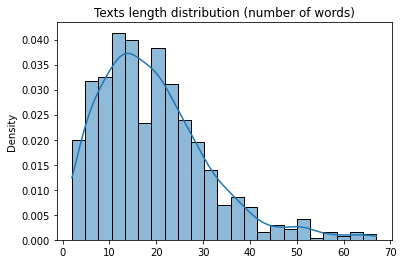

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

text_lengths = [len(t.split()) for t in train_texts]
ax = sns.histplot(data=text_lengths, kde=True, stat="density")
ax.set_title("Texts length distribution (number of words)")

We can check the count for each label in our DataFrame and sort them in descending order. Like this, we can get a better visualization of the distribution of our reviews in the dataset.

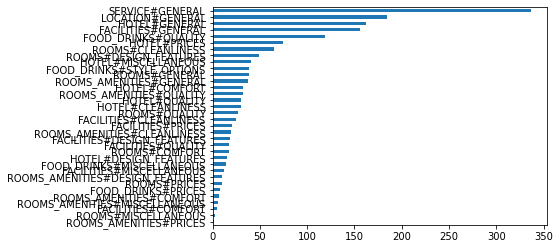

In [ ]:
LABEL_COLUMNS = df.columns.tolist()[1:]
train_df[LABEL_COLUMNS].sum().sort_values().plot(kind="barh");

**Data Preprocessing and Tokenization** 


In [ ]:
!pip install farasapy

In [ ]:
from farasa.stemmer import FarasaStemmer
from farasa.segmenter import FarasaSegmenter

In [ ]:
!cp drive/MyDrive/PFA/Utilities/normalize.py drive/MyDrive/PFA/Utilities/arabic_stopwords.py drive/MyDrive/PFA/Utilities/stopwords.txt drive/MyDrive/PFA/Utilities/emoticons.txt .

In [ ]:
from arabic_stopwords import *
from normalize import *
segmenter = FarasaSegmenter(interactive=True)

[2022-04-27 12:43:49,948 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


#**Pre-Processing** (this approach has been delegated in favor of the pre-trained BERTTokenizer, so you can skip to the BERT Tokenization part)
(Removing Arabic Stopwords/ Diacritics/ Kashida / Lemmatization / Replace URL/Links/Phone Numbers ) and then Segmentation

In [ ]:
def remove_stopwords(text_in):
    stopwords = stopwords_list()
    text_out = ' '.join(filter(lambda word: word not in stopwords, text_in.split(' ')))
    return text_out

def normalize_text(new_text):
    # new_text = text.lower()
    # new_text = stemmer.stem(text)
    new_text = normalize_hamza(new_text)
    new_text = strip_diacritics(new_text)
    new_text = remove_stopwords(new_text)
    new_text = strip_tatweel(new_text)
    # new_text = normalize_lamalef(new_text)
    new_text = normalize_spellerrors(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
    new_text = keep_arabic_english_n_symbols(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)
    # new_text = segmenter.segment(new_text)
    return new_text

In [ ]:
import re

def replace_tatweel(text):
    TATWEEL = u'\u0640'

    text_list = list(text.split())
    new_text_list = text_list.copy()
    for (index,word) in enumerate(text_list):
       word = ''.join(c for i, c in enumerate(word) if i < 2 or c != word[i - 2])
       print(word)
      if re.search(TATWEEL, word):
        word_index = new_text_list.index(word, index)
        new_text_list.insert(word_index + 1, 'جدا')
    text = ' '.join(new_text_list)
    return re.sub(u'[%s]' % TATWEEL, '', text)

In [ ]:
def replace_emoticon(text):
  emoticon_list = []
  with open('emoticons.txt', 'r') as f:
    emoticons = f.readlines()
  for emoticon in emoticons:
    emoticon_list.append(tuple(map(str, emoticon.strip().split(', '))))
  emoji_dict = {k: v for (k, v) in emoticon_list}
  print(emoji_dict)
  new_text = text
  for emoj in emoji_dict:
    new_text = new_text.replace(emoj, emoji_dict[emoj])
  return new_text

replace_emoticon('😋 طعام لذيذ')


{'U+1F600': 'وجه مبتسم', 'U+1F603': 'وجه مبتسم بعيون كبيرة', 'U+1F604': 'وجه مبتسم بعيون مبتسمة', 'U+1F601': 'وجه مبهج بعيون مبتسمة', 'U+1F606': 'ابتسامة عريضة الوجه', 'U+1F605': 'وجه مبتسم بالعرق', 'U+1F923': 'يتدحرج على الأرض يضحك', 'U+1F602': 'وجه بدموع الفرح', 'U+1F642': 'وجه مبتسم قليلاً', 'U+1F643': 'الوجه المقلوب', 'U+1F609': 'غمز الوجه', 'U+1F60A': 'وجه مبتسم بعيون مبتسمة', 'U+1F607': 'وجه مبتسم بهالة', 'U+1F970': 'وجه مبتسم بقلوب', 'U+1F60D': 'وجه مبتسم بعيون قلب', 'U+1F618': 'وجه ينفخ قبلة', 'U+1F617': 'وجه يقبل', 'U+1F61A': 'تقبيل الوجه بعيون مغلقة', 'U+1F619': 'تقبيل الوجه بعيون مبتسمة', 'U+1F60B': 'وجه تذوق الطعام', 'U+1F61B': 'وجه بلسان', 'U+1F61C': 'غمز الوجه باللسان', 'U+1F92A': 'وجه خاص', 'U+1F61D': 'تحديق الوجه باللسان', 'U+1F911': 'وجه فم المال', 'U+1F917': 'وجه العناق', 'U+1F92D': 'وجه باليد فوق الفم', 'U+1F92B': 'صمت الوجه', 'U+1F914': 'وجه التفكير', 'U+1F910': 'وجه سحاب الفم', 'U+1F928': 'وجه بحاجب مرتفع', 'U+1F610': 'وجه محايد', 'U+1F611': 'وجه بلا تعبير', 'U+1F6

'😋 طعام لذيذ'

In [ ]:
text = ''' الحمــــــد رحــــــيم'''
new_text = replace_tatweel(text)
new_text

'الحمد جدا رحيم جدا'

In [ ]:
def process_text(x):
  text = x['text']
  processed_text = normalize_text(text)
  x['text'] = processed_text
  return x

In [ ]:
def df_process(dataset):
  return dataset.apply(process_text, axis=1)

#**Data After Pre-Processing**

In [ ]:
new_df = df_process(train_df)
new_df.head()

,text,FACILITIES#CLEANLINESS,FACILITIES#COMFORT,FACILITIES#DESIGN_FEATURES,FACILITIES#GENERAL,FACILITIES#MISCELLANEOUS,FACILITIES#PRICES,FACILITIES#QUALITY,FOOD_DRINKS#MISCELLANEOUS,FOOD_DRINKS#PRICES,...,ROOMS#PRICES,ROOMS#QUALITY,ROOMS_AMENITIES#CLEANLINESS,ROOMS_AMENITIES#COMFORT,ROOMS_AMENITIES#DESIGN_FEATURES,ROOMS_AMENITIES#GENERAL,ROOMS_AMENITIES#MISCELLANEOUS,ROOMS_AMENITIES#PRICES,ROOMS_AMENITIES#QUALITY,SERVICE#GENERAL
3830,مواقف السيارات قليله,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3831,موجود دم مفارش السرير اوراق بالحجره,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3832,موظف الكونسيراج السوداني يحتاج دورات التعامل ا...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3833,موظف وحيد الاستقبال حامل للشنط,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3834,موظفه الاستقبال محترفه يكن الفندق سيءا لديهم ش...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
!pip install transformers

#**Bert Tokenization using The Pre-trained AraBERT Model Vocabulary**

We test a sample to see the BertTokenizer at work (After importing the Arabert Model). We used bert-base-arabertv02 for the tokenization process.

In [ ]:
from transformers import AutoTokenizer, AdamW, get_linear_schedule_with_warmup
BERT_MODEL_NAME = "aubmindlab/bert-base-arabertv02"

tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_NAME)


In [ ]:
MAX_LENGTH = 128
NUM_LABELS = len(new_df.drop("text", axis=1).columns)
NUM_LABELS

34

In [ ]:
smpl = new_df.sample()
sample_text = " ".join(smpl["text"])
sample_labels = smpl.drop("text", axis=1).values

We can try the tokenization process that is provided in the BERT pretrained model with a sample line or review

In [ ]:
sample = ''' هَذِهِ الخِدْمَاتُ جَيِّدَةٌ فِي هَذَا الفُنْدُقِ وَ يَسْتَحِقُّ كُلَّ النُّجومِ الخَمْسَةِ . لَقَدْ اسْتَمْتَعْتَ بِاَلْاَيّامِ اَلَّتِي قَضَيْتُها هُنَا كَثِيرًا و اتَّطَلَّعَ لِلزِّيَارَةِ المُقْبِلَةِ'''

print(sample)
# for the tokenization we need to remove diacritics from the sample so that it can be recognized.
sample = normalize_text(sample)

encoding = tokenizer.encode(sample)
print(encoding)
print(tokenizer.convert_ids_to_tokens(encoding))

 هَذِهِ الخِدْمَاتُ جَيِّدَةٌ فِي هَذَا الفُنْدُقِ وَ يَسْتَحِقُّ كُلَّ النُّجومِ الخَمْسَةِ . لَقَدْ اسْتَمْتَعْتَ بِاَلْاَيّامِ اَلَّتِي قَضَيْتُها هُنَا كَثِيرًا و اتَّطَلَّعَ لِلزِّيَارَةِ المُقْبِلَةِ
[2, 2273, 4848, 195, 11219, 6655, 7414, 7670, 195, 1980, 43998, 228, 3144, 1997, 46195, 682, 2144, 47695, 4338, 1297, 195, 3]
['[CLS]', 'الخدمات', 'جيد', '##ه', 'الفندق', 'يستحق', 'النجوم', 'الخمس', '##ه', 'لقد', 'استمتع', '##ت', 'بالا', '##يام', 'قضيتها', 'ات', '##طلع', 'للزي', '##اره', 'المقبل', '##ه', '[SEP]']


In [ ]:
features = tokenizer.encode_plus(sample, padding='max_length', add_special_tokens=True, return_attention_mask=True, return_token_type_ids=True, return_tensors='pt', max_length=MAX_LENGTH)

The tokenizer encoding returns an array of input ids. We can get back the tokens from those Ids with the convert_ids_to_tokens method inside the tokenizer
Let's try it in our example: 

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(features["input_ids"].squeeze()[:30])
print(tokens)

['[CLS]', 'الخدمات', 'جيد', '##ه', 'الفندق', 'يستحق', 'النجوم', 'الخمس', '##ه', 'لقد', 'استمتع', '##ت', 'بالا', '##يام', 'قضيتها', 'ات', '##طلع', 'للزي', '##اره', 'المقبل', '##ه', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


The attention mask allows to mask the tokens in our sentence with value of 1 and the padding tokens are registred with value 0

In [ ]:
input_masks = features["attention_mask"].numpy().flatten()
print(input_masks)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
tokens_count = []

for _, row in train_df.iterrows():
  token_count = len(tokenizer.encode(
      row["text"],
      max_length=MAX_LENGTH,
      truncation=True
  ))
  tokens_count.append(token_count)

We can visualize the frequency of the token count in our dataset

(0.0, 256.0)

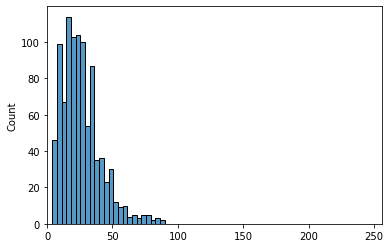

In [ ]:
sns.histplot(tokens_count)
plt.xlim([0,256])

By looking at the plot, we can choose the appropriate value for the max token count by its frequency. For this purpose we chose the MAX_TOKEN_LENGTH to be equal to 128.

To build our model, we proceeded to use the Pytorch Framework for our case as it provides better object oriented approach (which we will be using later on) compared to the Tensorflow framework

In [ ]:
!pip install pytorch-lightning
!pip install torchmetrics

# **Dataset**
Firs we define the Hotel Review Dataset in a Pytorch Dataset and converting the labels to tensors

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl
from torchmetrics.functional import auroc, accuracy, f1
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger


ImportError: ignored

Creating our wrapper dataset along with the tokenization process then converting the labels into tensors.

In [ ]:
class HotelReviewDataset(Dataset):

  def __init__(
    self, 
    data: pd.DataFrame, 
    tokenizer: AutoTokenizer, 
    max_token_len: int = 128
  ):
    self.tokenizer = tokenizer
    self.data = data
    self.max_token_len = max_token_len
    
  def __len__(self):
    return len(self.data)

  def __getitem__(self, index: int): 
    data_row = self.data.iloc[index]

    text = data_row.text
    labels = data_row[LABEL_COLUMNS]

    encoding = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_token_len,
      return_token_type_ids=False,
      padding="max_length",
      truncation=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return dict(
      text=text,
      input_ids=encoding["input_ids"].flatten(),
      attention_mask=encoding["attention_mask"].flatten(),
      labels=torch.FloatTensor(labels)
    )

We can check the size of the size of the tensors. For this example we took the first row in the dataset.

In [ ]:
train_dataset = HotelReviewDataset(
    train_df,
    tokenizer,
    max_token_len=MAX_LENGTH
)
train_dataset[0]["input_ids"].shape

We define the batch size that will be used when building the model and the number of workers. We also declared the used metric for the classification. The batch size can be increased further but we chose to keep it that way due to memory limiations in the Colab.

In [ ]:
BATCH_SIZE = 8
NUM_WORKERS = 2
METRIC_NAME = "f1"

Importing the BERTModel from the huggingface repository.
The used model is "aubmindlab/bert-base-arabertv02".
We used this model because it's more lightweight than the large one which has more attention heads and a larger hidden size.

In [ ]:
from transformers import BertModel

bert_model = BertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)

We can test with a sample batch then checking if it has the right shape

In [ ]:
sample_batch = next(iter(DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)))
sample_batch["input_ids"].shape, sample_batch["attention_mask"].shape

Wrapping our hotel review in a custom dataset

In [ ]:
class HotelReviewDataModule(pl.LightningDataModule):

  def __init__(self, train_df, test_df, tokenizer, batch_size=8, max_token_len=128):
    super().__init__()
    self.batch_size = batch_size
    self.train_df = train_df
    self.test_df = test_df
    self.tokenizer = tokenizer
    self.max_token_len = max_token_len

  def setup(self, stage=None):
    self.train_dataset = HotelReviewDataset(
      self.train_df,
      self.tokenizer,
      self.max_token_len
    )

    self.test_dataset = HotelReviewDataset(
      self.test_df,
      self.tokenizer,
      self.max_token_len
    )

  def train_dataloader(self):
    return DataLoader(
      self.train_dataset,
      batch_size=self.batch_size,
      shuffle=True,
      num_workers=2
    )

  def val_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=2
    )

  def test_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=2
    )

We define the number of epochs we will use in the training process

In [ ]:
N_EPOCHS = 10

data_module = HotelReviewDataModule(
  train_df,
  val_df,
  tokenizer,
  batch_size=BATCH_SIZE,
  max_token_len=MAX_LENGTH
)

# **Building the Model**
From here, we'll be building our model for use. We can start by packing everything in a Pytorch LightningModule. Our model will be using a pre-trained BERT model (the AraBERT v02 model) and a linear layer to convert the BERT representation to a classification task.

For the optimizer we opted to use the AdamW optimizer as it leads to better training loss and that the models generalize much better than models trained with Adam.

In [ ]:
class HotelReviewTagger(pl.LightningModule):

  def __init__(self, n_classes: int, n_training_steps=None, n_warmup_steps=None):
    super().__init__()
    self.bert = BertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)
    self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)
    self.n_training_steps = n_training_steps
    self.n_warmup_steps = n_warmup_steps
    self.criterion = nn.BCELoss()

  def forward(self, input_ids, attention_mask, labels=None):
    output = self.bert(input_ids, attention_mask=attention_mask)
    output = self.classifier(output.pooler_output)
    output = torch.sigmoid(output)    
    loss = 0
    if labels is not None:
        loss = self.criterion(output, labels)
    return loss, output

  def training_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("train_loss", loss, prog_bar=True, logger=True)
    return {"loss": loss, "predictions": outputs, "labels": labels}

  def validation_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss

  def test_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss

  def training_epoch_end(self, outputs):
    
    labels = []
    predictions = []
    for output in outputs:
      for out_labels in output["labels"].detach().cpu():
        labels.append(out_labels)
      for out_predictions in output["predictions"].detach().cpu():
        predictions.append(out_predictions)

    labels = torch.stack(labels).int()
    predictions = torch.stack(predictions)

    for i, name in enumerate(LABEL_COLUMNS):
      class_roc_auc = auroc(predictions[:, i], labels[:, i])
      self.logger.experiment.add_scalar(f"{name}_roc_auc/Train", class_roc_auc, self.current_epoch)


  def configure_optimizers(self):

    optimizer = AdamW(self.parameters(), lr=2e-5)

    scheduler = get_linear_schedule_with_warmup(
      optimizer,
      num_warmup_steps=self.n_warmup_steps,
      num_training_steps=self.n_training_steps
    )

    return dict(
      optimizer=optimizer,
      lr_scheduler=dict(
        scheduler=scheduler,
        interval='step'
      )
    )

## Optimizer scheduler
The job of a scheduler is to change the learning rate of the optimizer during training. This might lead to better performance of our model. We'll use the get_linear_schedule_with_warmup.

In [ ]:
dummy_model = nn.Linear(2, 1)

optimizer = AdamW(params=dummy_model.parameters(), lr=0.001)

warmup_steps = 20
total_training_steps = 100

scheduler = get_linear_schedule_with_warmup(
  optimizer, 
  num_warmup_steps=warmup_steps,
  num_training_steps=total_training_steps
)

learning_rate_history = []

for step in range(total_training_steps):
  optimizer.step()
  scheduler.step()
  learning_rate_history.append(optimizer.param_groups[0]['lr'])

In [ ]:
plt.plot(learning_rate_history, label="learning rate")
plt.axvline(x=warmup_steps, color="red", linestyle=(0, (5, 10)), label="warmup end")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Learning rate")
plt.tight_layout();

We simulate 100 training steps and tell the scheduler to warm up for the first 20. The learning rate grows to the initial fixed value of 0.001 during the warm-up and then goes down (linearly) to 0.

To use the scheduler, we need to calculate the number of training and warm-up steps. The number of training steps per epoch is equal to `number of training examples / batch size`. The number of total training steps is `training steps per epoch * number of epochs`:

In [ ]:
steps_per_epoch=len(train_df) // BATCH_SIZE
total_training_steps = steps_per_epoch * N_EPOCHS

We'll use a fifth of the training steps for a warm-up:

In [ ]:
warmup_steps = total_training_steps // 5
warmup_steps, total_training_steps

We will now create an instance of the HotelReviewTagger which is our model :

In [ ]:
model = HotelReviewTagger(
  n_classes=len(LABEL_COLUMNS),
  n_warmup_steps=warmup_steps,
  n_training_steps=total_training_steps 
)

##Evaluation
Multi-label classification boils down to doing binary classification for each label/tag.

We'll use Binary Cross Entropy to measure the error for each label. PyTorch has BCELoss, which we're going to combine with a sigmoid function

We will take a sample from the dataset to calculate the loss of the prediction: 

In [ ]:
sample_batch = next(iter(DataLoader(train_dataset, batch_size=8, num_workers=2)))
sample_batch["input_ids"].shape, sample_batch["attention_mask"].shape

In [ ]:
_, predictions = model(sample_batch["input_ids"], sample_batch["attention_mask"])
predictions

In [ ]:
criterion = nn.BCELoss()
criterion(predictions, sample_batch["labels"])

# **Training**

Now we will proceed with the training phase:

In [ ]:
!rm -rf lightning_logs/
!rm -rf checkpoints/

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./lightning_logs

Checkpointing saves the best model (based on validation loss):

In [ ]:
checkpoint_callback = ModelCheckpoint(
  dirpath="checkpoints",
  filename="best-checkpoint",
  save_top_k=1,
  verbose=True,
  monitor="val_loss",
  mode="min"
)

Log the progress in TensorBoard:

In [ ]:
logger = TensorBoardLogger("lightning_logs", name="hotel-review-comments")

And early stopping triggers when the loss hasn't improved for the last 2 epochs

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

We can start the training process:

In [ ]:
trainer = pl.Trainer(
  logger=logger,
  checkpoint_callback=checkpoint_callback,
  callbacks=[early_stopping_callback],
  max_epochs=N_EPOCHS,
  gpus=1,
  progress_bar_refresh_rate=30
)

In [ ]:
trainer.fit(model, data_module)

We instanciate the validation dataloader so we can inject in the Trainer test method.

In [ ]:
test_df = pd.read_excel(DATASETS_PATH + 'test_dataset.xlsx')
test_dataset = HotelReviewDataset(val_df, tokenizer)

test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=2)

And now we proceed with the evaluation of our training.

In [ ]:
trainer.test(dataloaders=test_dataloader)

# **Predictions**

Now we can predict results if we input a comment that means we can obtain the labels that define a particular comment.

First of all, we need to load the best model (according to the validation loss) from our checkpoint.

In [ ]:
trained_model = HotelReviewTagger.load_from_checkpoint(
  trainer.checkpoint_callback.best_model_path,
  n_classes=len(LABEL_COLUMNS)
)
trained_model.eval()
trained_model.freeze()

We can predict on a sample review. 

We can change the threshold parameter to configure the minimum value where that label is considered valid. That way , we can reduce the number of noise in our prediction.

We'll take only tag predictions above (or equal) to the threshold.

In [ ]:
THRESHOLD = 0.3
test_comment = "مسبح متسخ لا تستطيع السباحة فيه"

encoding = tokenizer.encode_plus(
  test_comment,
  add_special_tokens=True,
  max_length=128,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)

_, test_prediction = trained_model(encoding["input_ids"], encoding["attention_mask"])
test_prediction = test_prediction.flatten().numpy()

for label, prediction in zip(LABEL_COLUMNS, test_prediction):
  if prediction < THRESHOLD:
    continue
  print(f"{label}: {prediction}")

# **Evaluation**
We'll start by taking all predictions and labels from the validation set:

In [ ]:
from tqdm.auto import tqdm

test_df = pd.read_excel(DATASETS_PATH + 'test_dataset.xlsx')
device = torch.device('cuda')
trained_model = trained_model.to(device)

test_dataset = HotelReviewDataset(
  test_df,
  tokenizer,
  max_token_len=MAX_LENGTH
)

predictions = []
labels = []

for item in tqdm(test_dataset):
  _, prediction = trained_model(
    item["input_ids"].unsqueeze(dim=0).to(device), 
    item["attention_mask"].unsqueeze(dim=0).to(device)
  )
  predictions.append(prediction.flatten())
  labels.append(item["labels"].int())

predictions = torch.stack(predictions).detach().cpu()
labels = torch.stack(labels).detach().cpu()

For this evaluation we can use one simple metric which is the accuracy of the model:

In [ ]:
accuracy(predictions, labels, threshold=THRESHOLD)

## ROC Curve
Another metric we're going to use is the area under the Receiver operating characteristic (ROC) for each tag. ROC is created by plotting the True Positive Rate (TPR) vs False Positive Rate (FPR):
<p align="center">
$ TPR = \frac{TP}{TP+FN} $
</p>
<p align="center">
$ FPR = \frac{FP}{FP+TN} $
</p>

Let's check the ROC for each tag:

In [ ]:
print("AUROC per tag")
for i, name in enumerate(LABEL_COLUMNS):
  tag_auroc = auroc(predictions[:, i], labels[:, i], pos_label=1)
  print(f"{name}: {tag_auroc}")

When we apply the thresholding, we can obtain the following results by printing the classification report. Our metric is the F1-score. As you can see, the model is less accurate with the tags with low amount of examples.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = predictions.numpy()
y_true = labels.numpy()

upper, lower = 1, 0

y_pred = np.where(y_pred > THRESHOLD, upper, lower)

print(classification_report(
  y_true, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0
))

In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss

print(accuracy_score(y_true, y_pred))